# Capstone Project (Week 2) - Mohammad Qara

Choosing best location to rent an ampartment near a sport gym and school a mall market in Jeddah, Saudi Arabia

----

### Import necessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt

#conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

### Forsqure API Info

In [2]:
CLIENT_ID = 'PO5AQDNDCLHWFA1XJYXNEXK5MRRCII1BN4VA3IT4T1CUCQYG'
CLIENT_SECRET = 'M0HKPPRKBRJ04NNCCC4L2CE23RTIFQDU54CLMZBVYLVURXNB'
VERSION = '20180604'
LIMIT = 30

In [3]:
address = 'Jeddah'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

21.5822247 39.1640396


### Define search term

In [4]:
search_query = 'gym'
radius = 5000

### Define the corresponding URL

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=PO5AQDNDCLHWFA1XJYXNEXK5MRRCII1BN4VA3IT4T1CUCQYG&client_secret=M0HKPPRKBRJ04NNCCC4L2CE23RTIFQDU54CLMZBVYLVURXNB&ll=21.5822247,39.1640396&v=20180604&query=gym&radius=5000&limit=30'

### Send the GET Request

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d6d10706001bc0037d11f23'},
 'response': {'venues': [{'id': '4fb12a76e4b0fc5eabcb1f2b',
    'name': 'Body Power Gym (نادي طاقة الجسم)',
    'location': {'address': 'hamad al jaser st.',
     'lat': 21.572373619796213,
     'lng': 39.158497428355155,
     'labeledLatLngs': [{'label': 'display',
       'lat': 21.572373619796213,
       'lng': 39.158497428355155}],
     'distance': 1237,
     'cc': 'SA',
     'city': 'جدة',
     'state': 'منطقة مكة',
     'country': 'المملكة العربية السعودية',
     'formattedAddress': ['hamad al jaser st.',
      'جدة',
      'المملكة العربية السعودية']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1567428720',
    'hasPerk': False},
   {'id': '4c69c803897b1b8d242db017',
    'name': "G

### Get relevant part of JSON and transform it into a *pandas* dataframe

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_gym = json_normalize(venues)
df_gym.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4fb12a76e4b0fc5eabcb1f2b,hamad al jaser st.,SA,جدة,المملكة العربية السعودية,NaN,1237,"[hamad al jaser st., جدة, المملكة العربية السع...","[{'label': 'display', 'lat': 21.57237361979621...",21.572374,39.158497,NaN,NaN,منطقة مكة,Body Power Gym (نادي طاقة الجسم),v-1567428720
1,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,4c69c803897b1b8d242db017,Al-Batarji St.,SA,جدة,المملكة العربية السعودية,NaN,3399,"[Al-Batarji St., جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.59748715909033...",21.597487,39.135594,NaN,NaN,منطقة مكة,Gold's Gym,v-1567428720
2,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,5669c418498e5448d559e2cb,NaN,SA,جدة,المملكة العربية السعودية,NaN,1200,"[جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.57995880042156...",21.579959,39.175376,NaN,NaN,منطقة مكة,Body Power Gym (نادي طاقة الجسم),v-1567428720
3,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4f4628fae4b0ab39f53d862e,الفيصلية,SA,جدة,المملكة العربية السعودية,NaN,2376,"[الفيصلية, جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.56621309057107...",21.566213,39.179223,NaN,NaN,منطقة مكة,Body Action GYM (الدباغ الرياضي),v-1567428720
4,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,52a0b389498e2eac933211d7,NaN,SA,NaN,المملكة العربية السعودية,NaN,3722,[المملكة العربية السعودية],"[{'label': 'display', 'lat': 21.61303180975069...",21.613032,39.150045,NaN,NaN,NaN,Iron World GYM (نادي عالم الحديد),v-1567428720


### Formating the results

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_gym.columns if col.startswith('location.')] + ['id']
dataframe_filtered_gym = df_gym.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_gym['categories'] = dataframe_filtered_gym.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_gym.columns = [column.split('.')[-1] for column in dataframe_filtered_gym.columns]

dataframe_filtered_gym

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Body Power Gym (نادي طاقة الجسم),Gym,hamad al jaser st.,SA,جدة,المملكة العربية السعودية,NaN,1237,"[hamad al jaser st., جدة, المملكة العربية السع...","[{'label': 'display', 'lat': 21.57237361979621...",21.572374,39.158497,NaN,NaN,منطقة مكة,4fb12a76e4b0fc5eabcb1f2b
1,Gold's Gym,Gym / Fitness Center,Al-Batarji St.,SA,جدة,المملكة العربية السعودية,NaN,3399,"[Al-Batarji St., جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.59748715909033...",21.597487,39.135594,NaN,NaN,منطقة مكة,4c69c803897b1b8d242db017
2,Body Power Gym (نادي طاقة الجسم),Gym,NaN,SA,جدة,المملكة العربية السعودية,NaN,1200,"[جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.57995880042156...",21.579959,39.175376,NaN,NaN,منطقة مكة,5669c418498e5448d559e2cb
3,Body Action GYM (الدباغ الرياضي),Gym,الفيصلية,SA,جدة,المملكة العربية السعودية,NaN,2376,"[الفيصلية, جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.56621309057107...",21.566213,39.179223,NaN,NaN,منطقة مكة,4f4628fae4b0ab39f53d862e
4,Iron World GYM (نادي عالم الحديد),Gym / Fitness Center,NaN,SA,NaN,المملكة العربية السعودية,NaN,3722,[المملكة العربية السعودية],"[{'label': 'display', 'lat': 21.61303180975069...",21.613032,39.150045,NaN,NaN,NaN,52a0b389498e2eac933211d7
5,Gold's Gym,Gym,Abdulaziz Matar St.,SA,Jeddah,المملكة العربية السعودية,Al Tahlia,2866,"[Abdulaziz Matar St. (Al Tahlia), Jeddah 23432...","[{'label': 'display', 'lat': 21.55685892390535...",21.556859,39.168786,NaN,23432,Western Province,4c37353093db0f479a4d1f92
6,muscles gym (نادي العضلات),Gym,NaN,SA,جدة,المملكة العربية السعودية,Alslamah Dist.,1682,"[Alslamah Dist., جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.59174617363128...",21.591746,39.151414,NaN,NaN,منطقة مكة,51a226d3498efd44d54794a0
7,Wolf Power Gym نادي قوة الذئب,Gym,شارع حلمي كتبي,SA,جدة,المملكة العربية السعودية,NaN,2921,"[شارع حلمي كتبي, جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.59202480159429...",21.592025,39.137862,NaN,NaN,منطقة مكة,576ada4c498e25499e9b443f
8,WORLD GYM (ورلد جيم),Gym,SERAFI MEGA MALL | صيرفي ميجا مول,SA,Jeddah,المملكة العربية السعودية,Tahlia street | شارع التحليه,3280,[SERAFI MEGA MALL | صيرفي ميجا مول (Tahlia str...,"[{'label': 'display', 'lat': 21.55974722378938...",21.559747,39.184533,NaN,NaN,Western Province,52c842dd11d252d539f013d3
9,WORLD GYM (ورلد جيم),Gym,For Ladies 😍,SA,جدة,المملكة العربية السعودية,NaN,4469,"[For Ladies 😍, جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.54942866863360...",21.549429,39.139134,NaN,NaN,منطقة مكة,55bf43c3498e7d23a4396636


### Searching for schools

In [9]:
search_query = 'school'
radius = 5000

In [10]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=PO5AQDNDCLHWFA1XJYXNEXK5MRRCII1BN4VA3IT4T1CUCQYG&client_secret=M0HKPPRKBRJ04NNCCC4L2CE23RTIFQDU54CLMZBVYLVURXNB&ll=21.5822247,39.1640396&v=20180604&query=school&radius=5000&limit=30'

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d6d10712619ee002c1bb2a4'},
 'response': {'venues': [{'id': '4fb769ffe4b08bf863564848',
    'name': 'AlNoha  School (مدارس النهى)',
    'location': {'address': 'Ghazal Al Misk',
     'crossStreet': 'Zahr Al Adab',
     'lat': 21.592728876126944,
     'lng': 39.158626198768616,
     'labeledLatLngs': [{'label': 'display',
       'lat': 21.592728876126944,
       'lng': 39.158626198768616}],
     'distance': 1296,
     'cc': 'SA',
     'city': 'جدة',
     'state': 'منطقة مكة',
     'country': 'المملكة العربية السعودية',
     'formattedAddress': ['Ghazal Al Misk (Zahr Al Adab)',
      'جدة',
      'المملكة العربية السعودية']},
    'categories': [{'id': '4bf58dd8d48988d13b941735',
      'name': 'School',
      'pluralName': 'Schools',
      'shortName': 'School',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1567428721',
    'hasPerk': False},
 

In [12]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_school = json_normalize(venues)
df_school.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4fb769ffe4b08bf863564848,Ghazal Al Misk,SA,جدة,المملكة العربية السعودية,Zahr Al Adab,1296,"[Ghazal Al Misk (Zahr Al Adab), جدة, المملكة ا...","[{'label': 'display', 'lat': 21.59272887612694...",21.592729,39.158626,NaN,NaN,منطقة مكة,AlNoha School (مدارس النهى),v-1567428721
1,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",False,4f8eff84e4b0a59082b28f1e,NaN,SA,NaN,المملكة العربية السعودية,NaN,1172,[المملكة العربية السعودية],"[{'label': 'display', 'lat': 21.57622797335070...",21.576228,39.154731,NaN,NaN,NaN,Alanjal Private School (مدارس الانجال الاهلية),v-1567428721
2,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",False,4c8f37301664b1f70a95a62f,Quraish St.,SA,جدة,المملكة العربية السعودية,Al Salamah Dist.,1901,"[Quraish St. (Al Salamah Dist.), جدة 23524, ال...","[{'label': 'display', 'lat': 21.59758583803542...",21.597586,39.155996,As Salamah,23524,منطقة مكة,Thamer International School (مدرسة ثامر العالمية),v-1567428721
3,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4e814eed5503563173f537d9,NaN,SA,جدة,المملكة العربية السعودية,NaN,3076,"[جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.60412602672073...",21.604126,39.145911,NaN,NaN,منطقة مكة,Jeddah Knowledge School (المدرسة العالمية بجدة),v-1567428721
4,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,543e33ef498ee9906be0631d,NaN,SA,جدة,المملكة العربية السعودية,NaN,263,"[جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.5841, 'lng': 3...",21.584100,39.165600,NaN,NaN,منطقة مكة,Slama Private School (مدارس سلامة الاهلية),v-1567428721


In [13]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_school.columns if col.startswith('location.')] + ['id']
dataframe_filtered_school = df_school.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_school['categories'] = dataframe_filtered_school.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_school.columns = [column.split('.')[-1] for column in dataframe_filtered_school.columns]

dataframe_filtered_school

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,AlNoha School (مدارس النهى),School,Ghazal Al Misk,SA,جدة,المملكة العربية السعودية,Zahr Al Adab,1296,"[Ghazal Al Misk (Zahr Al Adab), جدة, المملكة ا...","[{'label': 'display', 'lat': 21.59272887612694...",21.592729,39.158626,NaN,NaN,منطقة مكة,4fb769ffe4b08bf863564848
1,Alanjal Private School (مدارس الانجال الاهلية),Elementary School,NaN,SA,NaN,المملكة العربية السعودية,NaN,1172,[المملكة العربية السعودية],"[{'label': 'display', 'lat': 21.57622797335070...",21.576228,39.154731,NaN,NaN,NaN,4f8eff84e4b0a59082b28f1e
2,Thamer International School (مدرسة ثامر العالمية),General College & University,Quraish St.,SA,جدة,المملكة العربية السعودية,Al Salamah Dist.,1901,"[Quraish St. (Al Salamah Dist.), جدة 23524, ال...","[{'label': 'display', 'lat': 21.59758583803542...",21.597586,39.155996,As Salamah,23524,منطقة مكة,4c8f37301664b1f70a95a62f
3,Jeddah Knowledge School (المدرسة العالمية بجدة),School,NaN,SA,جدة,المملكة العربية السعودية,NaN,3076,"[جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.60412602672073...",21.604126,39.145911,NaN,NaN,منطقة مكة,4e814eed5503563173f537d9
4,Slama Private School (مدارس سلامة الاهلية),School,NaN,SA,جدة,المملكة العربية السعودية,NaN,263,"[جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.5841, 'lng': 3...",21.584100,39.165600,NaN,NaN,منطقة مكة,543e33ef498ee9906be0631d
5,Dar Jana International School (مدرسة دار جنى ا...,School,Safa St.,SA,جدة,المملكة العربية السعودية,NaN,4932,"[Safa St., جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.61293124488748...",21.612931,39.129685,NaN,NaN,منطقة مكة,509654b0e4b0a40e1ce78ba0
6,Children's world school (مدرسة عالم الصغار),School,حي الروضة,SA,NaN,المملكة العربية السعودية,NaN,1440,"[حي الروضة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.56930900445306...",21.569309,39.164845,NaN,NaN,NaN,5040713de4b08d9f583020ec
7,مدرسة دار الفرسان Dar Alforsan School,School,حي السلامة,SA,جدة,المملكة العربية السعودية,شارع محمد مسعود,2570,"[حي السلامة (شارع محمد مسعود), جدة 23524, المم...","[{'label': 'display', 'lat': 21.59914, 'lng': ...",21.599140,39.147130,As Salamah,23524,منطقة مكة,5a78049da6fe4d0158cc1270
8,Al-Salama School,High School,(مجمع السلامة التعليمي - القسم الثانوي),SA,جدة,المملكة العربية السعودية,عامر عبدالجبار,1517,[(مجمع السلامة التعليمي - القسم الثانوي) (عامر...,"[{'label': 'display', 'lat': 21.59480420455247...",21.594804,39.158399,NaN,NaN,منطقة مكة,4e88b3709adf3be210d4cb8d
9,Dar Jana International School (Boys),High School,Abdullah Al Khurayji St.,SA,Jeddah,المملكة العربية السعودية,Al Kayyal St.,2291,"[Abdullah Al Khurayji St. (Al Kayyal St.), Jed...","[{'label': 'display', 'lat': 21.56491658616089...",21.564917,39.152054,NaN,21312,Western Province,4dabe45943a112819719fc1d


### Search for malls

In [14]:
search_query = 'mall'
radius = 5000

In [15]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=PO5AQDNDCLHWFA1XJYXNEXK5MRRCII1BN4VA3IT4T1CUCQYG&client_secret=M0HKPPRKBRJ04NNCCC4L2CE23RTIFQDU54CLMZBVYLVURXNB&ll=21.5822247,39.1640396&v=20180604&query=mall&radius=5000&limit=30'

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d6d1072d03360002cc9eba5'},
 'response': {'venues': [{'id': '531a4c4f498e12b2dae718df',
    'name': 'Le Prestige Mall (لو برستيج مول)',
    'location': {'address': 'King Abdulaziz Branch Rd',
     'lat': 21.5655219853354,
     'lng': 39.12550628185272,
     'labeledLatLngs': [{'label': 'display',
       'lat': 21.5655219853354,
       'lng': 39.12550628185272}],
     'distance': 4401,
     'postalCode': '23414',
     'cc': 'SA',
     'city': 'جدة',
     'state': 'منطقة مكة',
     'country': 'المملكة العربية السعودية',
     'formattedAddress': ['King Abdulaziz Branch Rd',
      'جدة 23414',
      'المملكة العربية السعودية']},
    'categories': [{'id': '4bf58dd8d48988d1fd941735',
      'name': 'Shopping Mall',
      'pluralName': 'Shopping Malls',
      'shortName': 'Mall',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1567428722',
    'hasPerk': F

In [17]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_mall = json_normalize(venues)
df_mall.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,531a4c4f498e12b2dae718df,King Abdulaziz Branch Rd,SA,جدة,المملكة العربية السعودية,NaN,4401,"[King Abdulaziz Branch Rd, جدة 23414, المملكة ...","[{'label': 'display', 'lat': 21.5655219853354,...",21.565522,39.125506,NaN,23414,منطقة مكة,Le Prestige Mall (لو برستيج مول),v-1567428722,NaN
1,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4c434434d7fad13a504b0ada,Al Madinah Rd.,SA,جدة,المملكة العربية السعودية,NaN,5658,"[Al Madinah Rd., جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.63247745873650...",21.632477,39.155805,NaN,NaN,منطقة مكة,Mall of Arabia (مجمع العرب),v-1567428722,NaN
2,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4c68563f73851b8d5763ba39,Mohammed Bin Abdulaziz Street,SA,Jeddah,المملكة العربية السعودية,Al_Thalia St.,3159,[Mohammed Bin Abdulaziz Street (Al_Thalia St.)...,"[{'label': 'display', 'lat': 21.55401135627838...",21.554011,39.167409,NaN,NaN,JeDDAB,Le Mall (لومول),v-1567428722,NaN
3,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,51c06f67498e3f4ecfc15e0a,Sari St,SA,جدة,المملكة العربية السعودية,NaN,661,"[Sari St, جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.57954335933472...",21.579543,39.158333,NaN,NaN,منطقة مكة,Tajra Mall (تاجرة مول),v-1567428722,NaN
4,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4f871cf8e4b0ab0c18f4b19b,Al Bawadi Dist.,SA,جدة,المملكة العربية السعودية,NaN,1318,"[Al Bawadi Dist., جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.59107367280291...",21.591074,39.172510,NaN,NaN,منطقة مكة,Al Hijaz Mall (سوق الحجاز),v-1567428722,NaN


In [18]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_mall.columns if col.startswith('location.')] + ['id']
dataframe_filtered_mall = df_mall.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_mall['categories'] = dataframe_filtered_mall.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_mall.columns = [column.split('.')[-1] for column in dataframe_filtered_mall.columns]

dataframe_filtered_mall

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Le Prestige Mall (لو برستيج مول),Shopping Mall,King Abdulaziz Branch Rd,SA,جدة,المملكة العربية السعودية,NaN,4401,"[King Abdulaziz Branch Rd, جدة 23414, المملكة ...","[{'label': 'display', 'lat': 21.5655219853354,...",21.565522,39.125506,NaN,23414,منطقة مكة,531a4c4f498e12b2dae718df
1,Mall of Arabia (مجمع العرب),Shopping Mall,Al Madinah Rd.,SA,جدة,المملكة العربية السعودية,NaN,5658,"[Al Madinah Rd., جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.63247745873650...",21.632477,39.155805,NaN,NaN,منطقة مكة,4c434434d7fad13a504b0ada
2,Le Mall (لومول),Shopping Mall,Mohammed Bin Abdulaziz Street,SA,Jeddah,المملكة العربية السعودية,Al_Thalia St.,3159,[Mohammed Bin Abdulaziz Street (Al_Thalia St.)...,"[{'label': 'display', 'lat': 21.55401135627838...",21.554011,39.167409,NaN,NaN,JeDDAB,4c68563f73851b8d5763ba39
3,Tajra Mall (تاجرة مول),Shopping Mall,Sari St,SA,جدة,المملكة العربية السعودية,NaN,661,"[Sari St, جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.57954335933472...",21.579543,39.158333,NaN,NaN,منطقة مكة,51c06f67498e3f4ecfc15e0a
4,Al Hijaz Mall (سوق الحجاز),Shopping Mall,Al Bawadi Dist.,SA,جدة,المملكة العربية السعودية,NaN,1318,"[Al Bawadi Dist., جدة, المملكة العربية السعودية]","[{'label': 'display', 'lat': 21.59107367280291...",21.591074,39.172510,NaN,NaN,منطقة مكة,4f871cf8e4b0ab0c18f4b19b
5,Ice Land Mall (آيس لاند),Shopping Mall,Prince Sultan St.,SA,جدة,المملكة العربية السعودية,NaN,2712,"[Prince Sultan St., جدة, المملكة العربية السعو...","[{'label': 'display', 'lat': 21.59871005125332...",21.598710,39.144742,NaN,NaN,منطقة مكة,4f65fe34e4b098b396a9d9aa
6,Heraa Mall (سوق حراء الدولي),Shopping Mall,Hera'a St.,SA,Jeddah,المملكة العربية السعودية,Al Madinah Rd.,3843,"[Hera'a St. (Al Madinah Rd.), Jeddah 21573, ال...","[{'label': 'display', 'lat': 21.61531990615467...",21.615320,39.153446,NaN,21573,Western Province,4b8018b0f964a520d75130e3
7,Aziz Mall (عزيز مول),Shopping Mall,Prince Majid St.,SA,جدة,المملكة العربية السعودية,at Al Imam Ash Shafi,3464,"[Prince Majid St. (at Al Imam Ash Shafi), جدة,...","[{'label': 'display', 'lat': 21.57599330223835...",21.575993,39.196826,NaN,NaN,منطقة مكة,4ce02fcef8a4a1438802e3bc
8,Stars Avenue Mall (ستارز أڨينيو مول),Shopping Mall,Al Malek Rd.,SA,Jeddah,المملكة العربية السعودية,Sari St.,3924,"[Al Malek Rd. (Sari St.), Jeddah, المملكة العر...",NaN,21.573345,39.127352,NaN,NaN,"Jeddah, Western Province",4b6becb0f964a520c11c2ce3
9,Teatro Mall (تياترو مول),Shopping Mall,Al Tahlia St.,SA,جدة,المملكة العربية السعودية,Prince Sultan St.,4311,"[Al Tahlia St. (Prince Sultan St.), جدة 21411,...","[{'label': 'display', 'lat': 21.54827861885113...",21.548279,39.143979,NaN,21411,منطقة مكة,4e96dbcd4fc6cddc2048b701


### Visulize the results

In [19]:
dataframe_filtered_gym.name
dataframe_filtered_school.name
dataframe_filtered_mall.name

0               Le Prestige Mall (لو برستيج مول)
1                    Mall of Arabia (مجمع العرب)
2                                Le Mall (لومول)
3                         Tajra Mall (تاجرة مول)
4                     Al Hijaz Mall (سوق الحجاز)
5                       Ice Land Mall (آيس لاند)
6                   Heraa Mall (سوق حراء الدولي)
7                           Aziz Mall (عزيز مول)
8           Stars Avenue Mall (ستارز أڨينيو مول)
9                       Teatro Mall (تياترو مول)
10             Serafi Mega Mall (صيرفي ميجا مول)
11                     Roshana Mall (روشانا مول)
12                     Sawari Mall (الصواري مول)
13                     Argamy Mall || أرقامي مول
14         Mahmoud Saeed Market (سوق محمود سعيد)
15                       Sultan Mall (سلطان مول)
16                                    Urth Caffè
17                   Al Najjar Mall (سوق النجار)
18                          Sari Mall (صاري مول)
19                   Flamingo Mall (فلامنجو مول)
20                  

In [20]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='current location',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the gyms in blue
for lat, lng, label in zip(dataframe_filtered_gym.lat, dataframe_filtered_gym.lng, dataframe_filtered_gym.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
    
# add the malls in orange
for lat1, lng1, label1 in zip(dataframe_filtered_mall.lat, dataframe_filtered_mall.lng, dataframe_filtered_mall.categories):
    folium.features.CircleMarker(
        [lat1, lng1],
        radius=5,
        color='orange',
        popup=label1,
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(venues_map) 
    
    
# add the schools in green
for lat2, lng2, label2 in zip(dataframe_filtered_school.lat, dataframe_filtered_school.lng, dataframe_filtered_school.categories):
    folium.features.CircleMarker(
        [lat2, lng2],
        radius=5,
        color='green',
        popup=label2,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map) 
        

# display map
venues_map

lat    21.575347
dtype: float64
lng    39.15869
dtype: float64


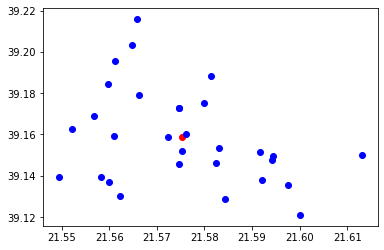

In [21]:
# extracting gym coordinates
x_gym = dataframe_filtered_gym.iloc[:, 10:11]
y_gym = dataframe_filtered_gym.iloc[:, 11:12]


#find the centroid of the gyms
coordinatesCenterGym = []

def findCenter(xList, yList, coordinates):
        xCenter = np.sum(xList)/len(xList)
        yCenter = np.sum(yList)/len(yList)
        coordinates.append(xCenter)
        coordinates.append(yCenter)
        return coordinates
    
findCenter(x_gym, y_gym, coordinatesCenterGym)    

# list to numpy array
np.array(coordinatesCenterGym)

# plot the list of gyms with the centeroid
plt.scatter(coordinatesCenterGym[0], coordinatesCenterGym[1], label = 'gym coordinates', color='red')
plt.scatter(x_gym, y_gym, label = 'gym coordinates', color='blue')

print(coordinatesCenterGym[0])
print(coordinatesCenterGym[1])

lat    21.584129
dtype: float64
lng    39.152215
dtype: float64


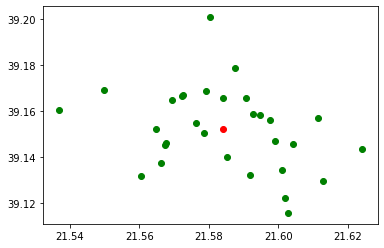

In [22]:
# extracting school coordinates
x_school = dataframe_filtered_school.iloc[:, 10:11]
y_school = dataframe_filtered_school.iloc[:, 11:12]

#find the centroid of the gyms
coordinatesCenterSchool = []

def findCenter(xList, yList, coordinates):
        xCenter = np.sum(xList)/len(xList)
        yCenter = np.sum(yList)/len(yList)
        coordinates.append(xCenter)
        coordinates.append(yCenter)
        return coordinates
    
findCenter(x_school, y_school, coordinatesCenterSchool)    

# list to numpy array
np.array(coordinatesCenterSchool)

# plot the list of gyms with the centeroid
plt.scatter(coordinatesCenterSchool[0], coordinatesCenterSchool[1], label = 'School coordinates', color='red')
plt.scatter(x_school, y_school, label = 'school coordinates', color='green')

print(coordinatesCenterSchool[0])
print(coordinatesCenterSchool[1])

lat    21.57936
dtype: float64
lng    39.159235
dtype: float64


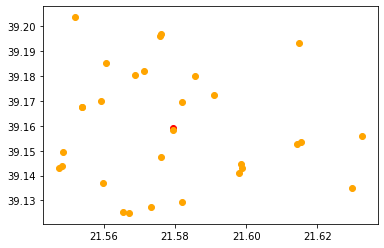

In [23]:
# extracting mall coordinates
x_mall = dataframe_filtered_mall.iloc[:, 10:11]
y_mall = dataframe_filtered_mall.iloc[:, 11:12]

#find the centroid of the gyms
coordinatesCenterMall = []

def findCenter(xList, yList, coordinates):
        xCenter = np.sum(xList)/len(xList)
        yCenter = np.sum(yList)/len(yList)
        coordinates.append(xCenter)
        coordinates.append(yCenter)
        return coordinates
    
findCenter(x_mall, y_mall, coordinatesCenterMall)    

# list to numpy array
np.array(coordinatesCenterMall)

# plot the list of gyms with the centeroid
plt.scatter(coordinatesCenterMall[0], coordinatesCenterMall[1], label = 'Mall coordinates', color='red')
plt.scatter(x_mall, y_mall, label = 'mall coordinates', color='orange')

print(coordinatesCenterMall[0])
print(coordinatesCenterMall[1])

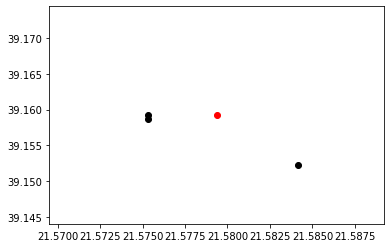

In [24]:
# Plotting the three centroids 

x_g = coordinatesCenterGym[0].lat
y_g = coordinatesCenterGym[1].lng

x_s = coordinatesCenterSchool[0].lat
y_s = coordinatesCenterSchool[1].lng

x_m = coordinatesCenterGym[0].lat
y_m = coordinatesCenterMall[1].lng

df_all_centroids = pd.DataFrame({'lat': [x_g,x_s ,x_m] , 'lng': [y_g,y_s ,y_m]})

#find the centroid of the gyms
coordinatesCenter = []

def findCenter(xList, yList, coordinates):
        xCenter = np.sum(xList)/len(xList)
        yCenter = np.sum(yList)/len(yList)
        coordinates.append(xCenter)
        coordinates.append(yCenter)
        return coordinates
    
findCenter(x_mall, y_mall, coordinatesCenter)    

# list to numpy array
np.array(coordinatesCenter)

# plot the list of gyms with the centeroid
plt.scatter(coordinatesCenter[0], coordinatesCenter[1], label = 'Mall coordinates', color='red')
plt.scatter(df_all_centroids.lat, df_all_centroids.lng, label = 'The three cenroids', color='black')

In [25]:
print("the most suitable place between the three types of location is lat: " + str(coordinatesCenter[0].lat) +" lng: " + str(coordinatesCenter[1].lng))

the most suitable place between the three types of location is lat: 21.579360241745352 lng: 39.15923497751423


### view the final map
this is the most suitable place ( centroid of all three types of locations, gym, school and shopping center )

In [26]:
venues_map = folium.Map(location=[21.579360241745352, 39.15923497751423], zoom_start=13)

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='current location',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the gyms in blue
for lat, lng, label in zip(dataframe_filtered_gym.lat, dataframe_filtered_gym.lng, dataframe_filtered_gym.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
    
# add the malls in orange
for lat1, lng1, label1 in zip(dataframe_filtered_mall.lat, dataframe_filtered_mall.lng, dataframe_filtered_mall.categories):
    folium.features.CircleMarker(
        [lat1, lng1],
        radius=5,
        color='orange',
        popup=label1,
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(venues_map) 
    
    
# add the schools in green
for lat2, lng2, label2 in zip(dataframe_filtered_school.lat, dataframe_filtered_school.lng, dataframe_filtered_school.categories):
    folium.features.CircleMarker(
        [lat2, lng2],
        radius=5,
        color='green',
        popup=label2,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map) 
        

# display map
venues_map

# Results 
After calculating the centroids of the three types, we got that coordenates 21.579360241745352, 39.15923497751423 and this area represent the center of the three clusters of locations in jeddah.

# Discussion 
after seeing the results, we noticed that the the final coordinates is located in a very great area which connects the with two main roads in Jeddah, Sari street and Madinah road street.. and this gives a good and fast access to the areas we need to reach

# Conclusion
based on this project, we figured out that the data analysis is a very interesting feild and very important department in each company, data need to be collected for any future analysis, and trough this project. we see how to import places from the FourSquare API and how to convert it to Pandas dataframe and finally visualize it trhough Folium.